## MDSC-103(P): SciPy


----------------------------------------------------------------
Author: Dr. Sampath Lonka 

Date: September 5, 2022

----------------------------------------------------------------
      

- It's used for scientific computing.
- It provides more specific functionality than generic data structures and mathematical algorithms of NumPy.
- It contains modules for the evaluation of special functions frequently used in science and engineering, optimization, integration, interpolation, and image manipulation.
- Many SciPy's algorithms are executed as compiled C code, so they are fast.
- It's open source software.
- The following topics will be covered in this module.
   - Special Functions
     - Gamma Function
     - Beta
     - erf
   - Optimization
     - Non Linear Optimization
       - `minimize_scalar()` and `minimize()` to minimize a function
      - `curve_fit()` to fit a function to aset of data
      - `root_scalar()` and `root()` to find the zeros of a function of one or several variables.
      - `linprog()` to minimize a linear objective function with linear inequality and equality constraints.   
      - Linear Programming

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import gamma

## Special Functions

## Gamma Function

$$
\Gamma(k) =\int_0^\infty x^{k-1}e^{-kx}dx 
$$

In [4]:
gamma(5) # 4!

24.0

## Error function

$$
erf(z) = {2\over\sqrt{\pi}}\int_0^ze^{-t^2}dt

In [5]:
from scipy.special import erf
gamma(1)

1.0

In [6]:
erf(2)

0.9953222650189527

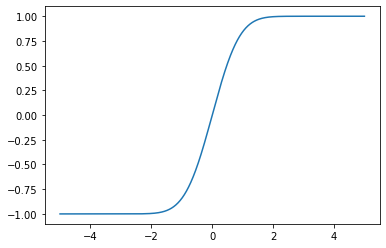

In [9]:
x = np.linspace(-5,5,1000)
plt.plot(x,erf(x))
plt.show()

## Basics in Optimization


In [12]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$

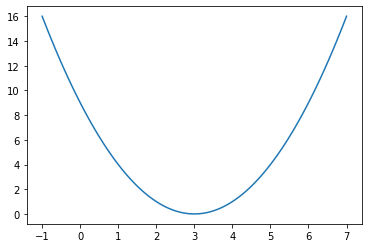

In [10]:
x = np.linspace(-1,7,100)
f = lambda x: (x-3)**2
plt.plot(x,f(x))

In [13]:
f = lambda x: (x-3)**2
x0 = 2 # initial guess
res = minimize(f,x0)
res

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [15]:
res.x[0]

2.999999992549203

In [17]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is an 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where 'n' is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <o

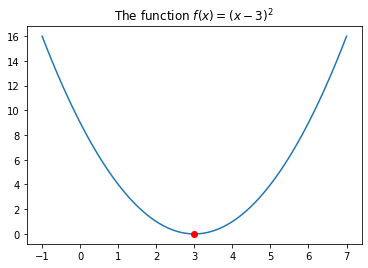

In [16]:
min = res.x[0]
plt.plot(x,f(x))
plt.plot(min,f(min), color='r',marker = "o")
plt.title(f'The function $f(x)=(x-3)^2$')
plt.show()

In [ ]:
from scipy.optimize import minimize_scalar
objective_function = lambda x: x**4 - x**2

result = minimize_scalar(objective_function)
print(result)

In [ ]:
x = np.linspace(-4,4,200)
fig = plt.figure(figsize=(10,8))
plt.plot(x,objective_function(x),c='r')
plt.title(f"The plot of $f(x) = x^4-x^2$")
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.xlim(-2,2)
plt.ylim(-0.5,1)
plt.grid()
plt.show()


In [ ]:
result = minimize_scalar(objective_function, method = "bounded", bounds = (0,1))
print(result)

## Minimization of a function with several variables

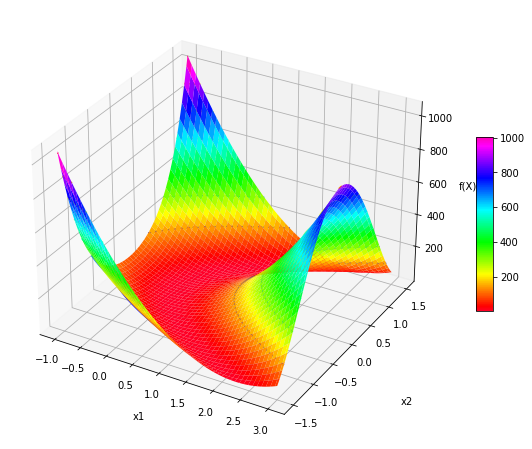

In [18]:
from mpl_toolkits.mplot3d import Axes3D

f = lambda x1, x2: 100*(x1-x2**2)**2 + (1-x2)**2
x2 = np.linspace(-1.5,1.5,100)
x1 = np.linspace(-1,3,100)

X, Y = np.meshgrid(x1,x2)
F = f(X,Y)

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection='3d') # set up the axis as a 3D plot
surf = ax.plot_surface(X,Y,F, cmap= 'gist_rainbow')
fig.colorbar(surf,shrink=0.4, aspect=10)
ax.contour(X, Y, F, cmap ='jet')
# set axes label
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=30)
ax.set_zlabel('f(X)', labelpad=10)


plt.show()

In [21]:
f = lambda x: 100*(x[0]-x[1]**2)**2 + (1-x[1])**2
x0 = [2,1.5]
res = minimize(f,x0)
res

      fun: 2.441444641749352e-11
 hess_inv: array([[1.74720099, 0.87302914],
       [0.87302914, 0.43746435]])
      jac: array([-2.79064287e-06,  4.66386331e-06])
  message: 'Optimization terminated successfully.'
     nfev: 66
      nit: 17
     njev: 22
   status: 0
  success: True
        x: array([0.99999011, 0.99999506])

Minimize $f(X) = (x-1)^2+(y-2.5)^2$
subject to 
$$x-2y+2\ge 0\\
-x-2y+6\ge0\\
x\ge0\\
y\ge0\\
$$ 

In [28]:
f = lambda x: (x[0]-1)**2 + (x[1]-2.5)**2
cons = ({'type': 'ineq','fun': lambda x: x[0]-2*x[1]+2}, # All constraints are greater than type
        {'type': 'ineq','fun': lambda x: -x[0]-2*x[1]+6}
        )
cons2 = ({'type': 'eq','fun': lambda x: x[0]-2*x[1]+2}, # All constraints are greater than type
        {'type': 'eq','fun': lambda x: -x[0]-2*x[1]+6}
        )

bnds = ((0,None),(0,None)) 

X0 = (2,0)
res = minimize(f,X0, bounds=bnds, constraints= cons)

In [25]:
res2 = minimize(f,X0)
res2


      fun: 1.0075886211189263e-15
 hess_inv: array([[0.93103449, 0.17241379],
       [0.17241379, 0.56896552]])
      jac: array([-4.85836291e-08,  1.47117323e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.99999997, 2.5       ])

In [23]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

In [ ]:
res3 = minimize(f,X0,bounds=bnds,constraints=con)

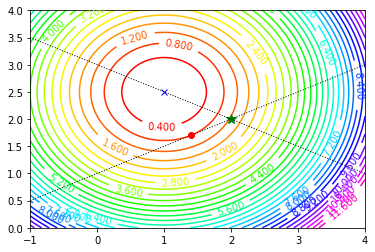

In [32]:
# plotting
x = np.linspace(-1, 4, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

fig = plt.figure(figsize=(6,4))
#ax = fig.add_subplot(1,2,1, projection='3d') # set up the axis as a 3D plot
#surf = ax.plot_surface(X,Y,F, cmap= 'gist_rainbow')
#fig.colorbar(surf,shrink=0.4, aspect=10)

#ax = fig.add_subplot(1,2,2)
levels = np.arange(0.0,12,0.4)
cp = plt.contour(X, Y, Z,levels=levels, cmap='gist_rainbow');
plt.clabel(cp)
plt.plot(x, (x+2)/2, 'k:', linewidth=1)
plt.plot(res.x[0],res.x[1],c='r',marker='o')
plt.plot(res2.x[0],res2.x[1],c='b',marker='x')
plt.plot(res3.x[0],res3.x[1],c='g',marker='*',markersize=10)
plt.plot(x, (-x+6)/2, 'k:', linewidth=1)
#plt.fill([1.25,1.25,1.75,1.75], [1.5,2.75,1.5,1.75], alpha=0.3)
plt.axis([-1,4,0,4])
plt.show()

In [29]:
f = lambda x: (x[0]-1)**2 + (x[1]-2.5)**2
cons = ({'type': 'ineq','fun': lambda x: x[0]-2*x[1]+2},
        {'type': 'ineq','fun': lambda x: -x[0]-2*x[1]+6}
        )

bnds = ((0,None),(0,None)) 

X0 = (2,0)
res3 = minimize(f,X0, bounds=bnds, constraints= cons2)

In [30]:
res3

     fun: 1.250000000000001
     jac: array([ 2.00000001, -0.99999999])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([2., 2.])

In [ ]:
res

In [ ]:
# for the documentation
minimize?

### Another Example:

$$
\text{Minimize}\ f(x)=−(2xy+2x−x^2−2y^2)
$$
subject
$$x^3−y=0\\ 
y−(x−1)^4−2\ge0\\ 
0.5\le x\le 1.51 \\  
1.5\le y \le 2.5\\  
$$

In [ ]:
f = lambda x: -(2*x[0]*x[1]+2*x[0]-x[0]**2-2*x[1]**2)
x0 =(0,2.5)
f(x0)

In [ ]:
f = lambda x: -(2*x[0]*x[1]+2*x[0]-x[0]**2-2*x[1]**2)


cons = ({'type': 'eq','fun': lambda x: x[0]**3-x[1]},
        {'type': 'ineq','fun': lambda x: x[1]-(x[0]-1)**4-2}
        )

bnds = ((0.5,1.51),(1.5,2.5)) 

X0 = (0,2.5)
res = minimize(f,X0, bounds=bnds, constraints= cons)

In [ ]:
res

In [ ]:
ux = minimize(f, x0, constraints=None,method='nelder-mead')
ux

In [ ]:
# plotting
x = np.linspace(-1, 6, 200)
y = np.linspace(-2, 3, 200)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((200,200))

fig = plt.figure(figsize=(10,8))
levels = np.arange(-1.99,16,1)
cp = plt.contour(X, Y, Z,levels=levels, cmap='gist_rainbow');
plt.clabel(cp)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.text(res['x'][0], res['x'][1], 'o', va='center', ha='center', size=20, color='red')
plt.text(ux['x'][0], ux['x'][1], '*', va='center', ha='center', size=20, color='red')
plt.plot(x, x**3, 'k:', linewidth=1)
plt.axis([-1,3,-1,2.5])
plt.show()

For more details on `scipy.optimize`, we refer to the [documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#nelder-mead-simplex-algorithm-method-nelder-mead).